# 0.) Import and Clean data

In [78]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [79]:
df = pd.read_csv("Country-data.csv", sep = ",")

In [80]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [81]:
y = df['country']
X = df.drop('country', axis = 1)
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [82]:
names = df[['country']].copy()

# 1.) Fit a kmeans Model with any Number of Clusters

In [83]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [84]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

# 2.) Pick two features to visualize across

In [85]:
WCSSs = []     
Ks = range(1,10)
for k in Ks:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

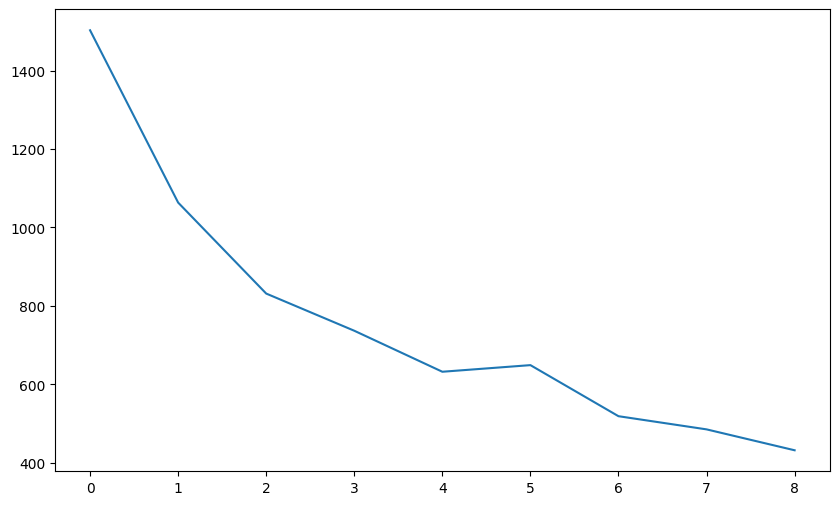

In [86]:
plt.figure(figsize = (10,6))
plt.plot(WCSSs)
plt.show()

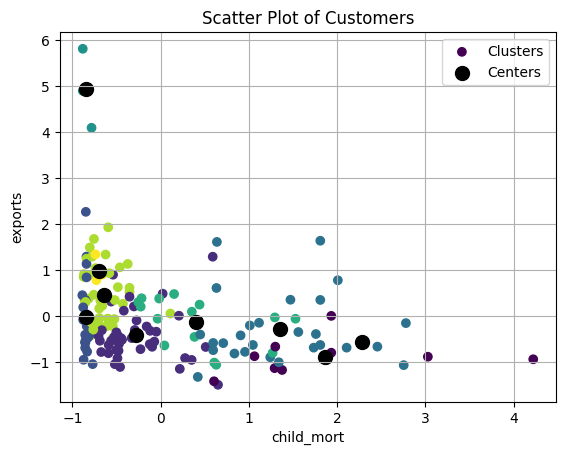

In [87]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 1


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [88]:
WCSSs = []
ks = range(1,15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random')
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [89]:
WCSSs = [KMeans(n_clusters = k, n_init = 30, init = 'random').fit(X_scaled).inertia_ for k in range(1,15)]


# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

Text(0.5, 0, 'WCSSs')

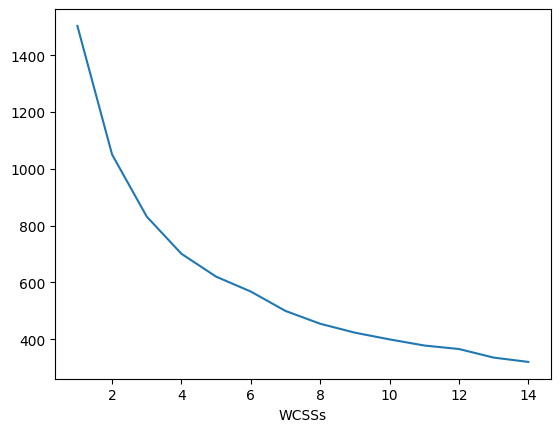

In [90]:
plt.plot(ks,WCSSs)
plt.xlabel('WCSSs')

# 6.) Do the same for a silhoutte plot

In [91]:
from sklearn.metrics import silhouette_score

In [92]:
silhouette_score?

In [93]:
CSSs = []
ks = range(2,15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random')
    kmeans.fit(X_scaled)
    labs = kmeans.labels_
    CSSs.append(silhouette_score(X_scaled,labs))


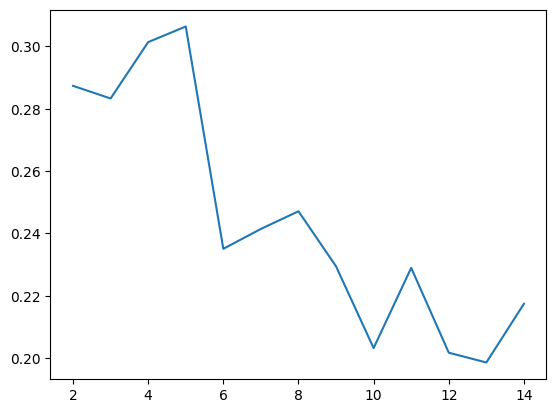

In [94]:
plt.plot(ks,CSSs)

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [95]:
kmeans = KMeans(n_clusters = 2, n_init = 30, init = 'random').fit(X_scaled)

In [96]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [97]:
output = pd.concat([preds,df],axis = 1)

In [98]:
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,1,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,0,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [99]:
output
print('cluster 1:')
list(output.loc[output[0]==0,'country'])

cluster 1:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

In [100]:
output
print('cluster 2:')
list(output.loc[output[0]==1,'country'])

cluster 2:


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [101]:
#### Write an observation

Countries in Cluster 1 are relatively high living standard countries and ones in Cluster 2 are lower living standard countries.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [102]:
output_2 = pd.concat([preds, X], axis = 1)

In [103]:
output_2

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,1,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,0,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [104]:
output_2.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [105]:
output_2.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


# 9.) Write an observation about the descriptive statistics.

On average, countries in the first claster (claster 0) have lower child_mortality rate, higher income and GDP, lower inflation, longer life expectancy than ones in the second claster (claster 1).